[![Open In Colab](https://colab.research.google.com/assets/colab-badge.zsdfgsvg)](https://colab.research.google.com/drive/161uCELLDMGOPhEz0D5EmlFcW4cfEa4AP?usp=sharing)


# Install and import packages 



# Key Imports


1.   Numpy for linear algebra
2.   Pandas for data processing
3.   Seaborn for statistics visualization
4.   Matplotlib for plotting



In [ ]:
#Main Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Filter warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Install off-the-shelf model
#pip install pyspark

# Data Loading
We use Pandas to load datasets from Github files, and we load the Pandas Dataframes with appropriate column headers.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt", sep="\t")
movies = pd.read_csv("https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt", sep="\t", encoding='ISO-8859-1')

In [ ]:
data.columns = ["User_ID", "Movie_ID", "Rating"]
movies.columns = ["Movie_ID", "Movie_Title", "Unknown","Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

# Data Extraction
We preview our Dataframes.

In [ ]:
data.head(3)

,User_ID,Movie_ID,Rating
0,186,302,3
1,22,377,1
2,244,51,2


In [ ]:
movies.head(2)

,Movie_ID,Movie_Title,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
print("Data Shape: ", data.shape)
print("Movies Shape: ", movies.shape)

Data Shape:  (99999, 3)
Movies Shape:  (1681, 21)


In [ ]:
print("Data Columns: ", data.columns)
print("Movie Columns: ", movies.columns)

Data Columns:  Index(['User_ID', 'Movie_ID', 'Rating'], dtype='object')
Movie Columns:  Index(['Movie_ID', 'Movie_Title', 'Unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


Text(0.5, 1.0, 'Histogram of Movie Ratings')

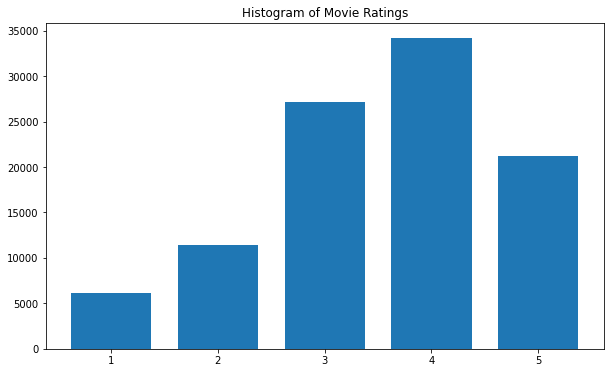

In [ ]:
#All ratings in the MovieLens Dataset
plt.figure(figsize=(10,6))
plt.hist(data["Rating"], bins=np.arange(1,7) - 0.5, rwidth=0.75)
plt.xticks(np.arange(1,6))
plt.title("Histogram of Movie Ratings")

In [ ]:
#Hashmap Movie_ID -> Rating
movie_ratings = {}
unique_movie_ids = np.unique(data["Movie_ID"])
for unique_id in unique_movie_ids:
  movie_ratings[unique_id] =  np.array(data["Rating"][np.where(data["Movie_ID"] == unique_id)[0]])


([<matplotlib.axis.XTick at 0x7fc9d0080a10>,
 <a list of 5 Text major ticklabel objects>)

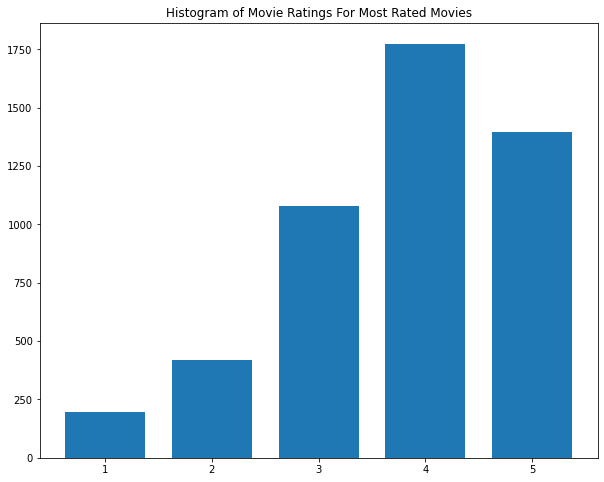

In [ ]:
#Ratings of Ten Most Popular Movies
top_ten_popular = np.zeros(shape=(10,2))
for movie_id in list(movie_ratings.keys()):
  if movie_ratings[movie_id].shape[0] > np.min(top_ten_popular[:,1]):
    top_ten_popular[np.argmin(top_ten_popular[:,1])] = [movie_id, movie_ratings[movie_id].shape[0]] 

#Plot Histogram
top_ten_popular_ratings = []
for i in top_ten_popular[:,0]:
  top_ten_popular_ratings.extend(movie_ratings[i])
plt.figure(figsize=(10,8))
plt.title("Histogram of Movie Ratings For Most Rated Movies")
plt.hist(top_ten_popular_ratings, bins=np.arange(1,7) - 0.5, rwidth=0.75)
plt.xticks(np.arange(1,6))

([<matplotlib.axis.XTick at 0x7f911ddbca90>,
 <a list of 5 Text major ticklabel objects>)

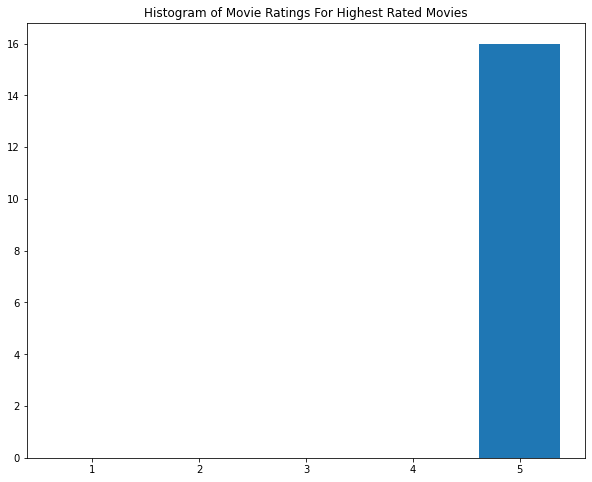

In [ ]:
#Ratings of Ten Highest Rated Movies
top_ten_rated = np.zeros(shape=(10,2))
for movie_id in list(movie_ratings.keys()):
  if np.mean(movie_ratings[movie_id]) > np.min(top_ten_rated[:,1]):
    top_ten_rated[np.argmin(top_ten_rated[:,1])] = [movie_id, np.mean(movie_ratings[movie_id])] 

#Plot Histogram
top_ten_rated_ratings = []
for i in top_ten_rated[:,0]:
  top_ten_rated_ratings.extend(movie_ratings[i])
plt.figure(figsize=(10,8))
plt.title("Histogram of Movie Ratings For Highest Rated Movies")
plt.hist(top_ten_rated_ratings, bins=np.arange(1,7) - 0.5, rwidth=0.75)
plt.xticks(np.arange(1,6))

We can see that the ratings of the top rated movies are all movies with one rating of 5, so we should keep number of ratings in mind.

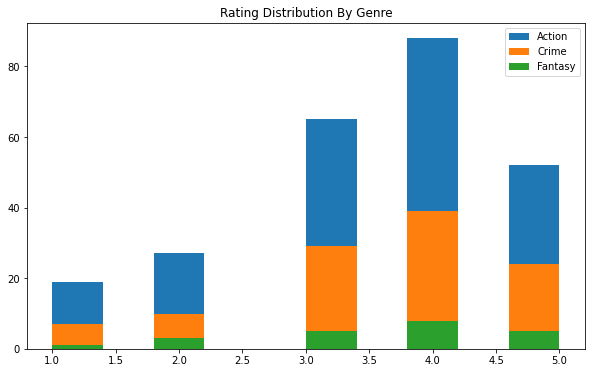

In [ ]:
#Ratings From 3 Genres
genres = ["Action", "Crime", "Fantasy"]
genre_ratings = [np.array(data["Rating"][np.where(movies[genres[i]] == 1)[0]]) for i in range(3)]

#Plot rating distributions for genres
plt.figure(figsize=(10,6))
plt.title("Rating Distribution By Genre")
for i in range(3):
  plt.hist(genre_ratings[i])
plt.legend(genres)

From this distribution we can see that these genres seem to have roughly the same distribution despite the difference in size.

# Matrix Factorization Visualization

In [ ]:
import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0, mult=1):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return mult * err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))

In [ ]:
#Split 90:10 into train-test
Y_train = np.array(data.iloc[:90000])
Y_test = np.array(data.iloc[90000:])

#Setup Factorization Parameters
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
print("Factorizing with ", M, " users, ", N, " movies.")

#Configure Grid of Regularization Parameters
regs = np.arange(.01,.5,.05)
eta = 0.03 

#Store Results
E_in = []
E_out = []

#Compute U/V
for reg in regs:
    U,V, err = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test))


#Plot
plt.plot(regs, E_in, label='$E_{in}$')
plt.plot(regs, E_out, label='$E_{out}$')
plt.title('Error vs. Reg')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

Based on the results of our grid search, we will use a regularization value of 0.1 given our k value of 20.

In [ ]:
#Split 90:10 into train-test
Y_train = np.array(data.iloc[:90000])
Y_test = np.array(data.iloc[90000:])

#Configure Matrix Factorization
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
K = 20
print("Factorizing with ", M, " users, ", N, " movies.")

#Configure Learning Rate and Regularization
reg = 0.01
eta = 0.03 # learning rate
E_in = []
E_out = []
m1_U, m1_V, m1_train_err = train_model(M, N, K, eta, reg, Y_train)

Factorizing with  943  users,  1682  movies.
Epoch 1, E_in (regularized MSE): 0.5212469348354698
Epoch 2, E_in (regularized MSE): 0.39556346183211594
Epoch 3, E_in (regularized MSE): 0.3547791293890312
Epoch 4, E_in (regularized MSE): 0.3242982348072226
Epoch 5, E_in (regularized MSE): 0.3007400086147262
Epoch 6, E_in (regularized MSE): 0.28429094032468677
Epoch 7, E_in (regularized MSE): 0.27334012745192576
Epoch 8, E_in (regularized MSE): 0.26003499358780513
Epoch 9, E_in (regularized MSE): 0.24919527431227365
Epoch 10, E_in (regularized MSE): 0.24257122524267624
Epoch 11, E_in (regularized MSE): 0.23400015626697682
Epoch 12, E_in (regularized MSE): 0.2272807709391726
Epoch 13, E_in (regularized MSE): 0.22390081119011984
Epoch 14, E_in (regularized MSE): 0.22139601986413213
Epoch 15, E_in (regularized MSE): 0.21408374249442536
Epoch 16, E_in (regularized MSE): 0.2117433914463854
Epoch 17, E_in (regularized MSE): 0.20893895725472184
Epoch 18, E_in (regularized MSE): 0.2036356958068902

# Off-The-Shelf / Biased Matrix Factorization
We now explore Surprise's NMF Matrix Factorization and SVD libraries. In particular, we performed biased matrix factorization for (2) and performed NMF matrix factorization using Surprise's NMF library for (3)

In [ ]:
#!pip install scikit-surprise
from surprise import NMF
from surprise import NMF
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

#Load Dataset
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.1)

#Perform Matrix Factorization
biased_svd = SVD(n_factors=20)
regular_nmf = NMF(n_factors=20)

#Train
biased_svd.fit(trainset)
regular_nmf.fit(trainset)

#Extract Matricies
m2_U, m2_V, m2_Ubias, m2_Vbias = biased_svd.pu, biased_svd.qi, biased_svd.bu, biased_svd.bi
m3_U, m3_V = regular_nmf.pu, regular_nmf.qi

# Visualization U/V Projection
Below, we write code to explore the principal components of the projections of U/V as well as the the projections of V for particular groupings of movies.

# Visualizations of V Projection
We now visualize our projection of V for various groupings of movies across the models.

In [ ]:
#Index Names For Annotation
from surprise import get_dataset_dir
def read_item_names():
    file_name = get_dataset_dir() + '/ml-100k/ml-100k/u.item'
    rid_to_name = {}
    name_to_rid = {}
    with open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]
    return rid_to_name, name_to_rid
rid_to_name, name_to_rid = read_item_names()

In [ ]:
#Generates annotated projection of V projection for group
def visualize_projection(V_proj, names, grouping_title, model_name):
  print(names)
  assert V_proj.shape[0] == names.shape[0]
  plt.figure(figsize=(10,6))
  plt.title("Visualize Latent Factors Of {} in V Projection for {} model".format(grouping_title, model_name))
  plt.xlabel("1st Principal Component")
  plt.ylabel("2nd Principal Component")
  for i in range(V_proj.shape[0]):
    value = V_proj[i, 0], V_proj[i, 1]
    plt.scatter(value[0], value[1])
    plt.annotate(names[i], value)

#Fetches info for projection for indices
def fetch_names(indices):
  names = []
  for i in range(len(indices)): 
    movie_name = movies.iloc[int(indices[i])]['Movie_Title']
    names.append(movie_name)
  return np.array(names )

def fetch_group(indices, V, transform_index=False, model=None):
  
  #Project U and V into 2D space
  A, S, B = np.linalg.svd(V)
  V_proj = np.matmul(np.transpose(A[:,0:2]), V).T

  #Gather List
  V_proj_lst = np.zeros(shape=(len(indices), 2))
  names = []
  for i in range(len(indices)): 
    if indices[i] == -1:
      V_proj_lst[i,0] =  np.random.uniform(-1,1)
      V_proj_lst[i,1] =  np.random.uniform(-1,1)  
    else:
      V_proj_lst[i,0] =  V_proj[int(indices[i]),0]
      V_proj_lst[i,1] =  V_proj[int(indices[i]),1]  
  return V_proj_lst

In [ ]:
#Code to fetch groups
def fetch_groups(movie_ids, m2, m3):

    #Generate movie indices
    m1_g = movie_ids
    m2_g = []
    m3_g = []
    for i in range(len(movie_ids)):
      try:
        name = movies.iloc[movie_ids[i]]['Movie_Title']
        rid = name_to_rid[name]
        iid = biased_svd.trainset.to_inner_iid(rid)
        m2_g.append(iid)
        m3_g.append(iid)
      except:
        m2_g.append(-1)
        m3_g.append(-1)
    
    #Return
    return m1_g, m2_g, m3_g

Now we visualize 10 random movies of our choice using V_proj.


['Waterworld (1995)'
 'Adventures of Priscilla, Queen of the Desert, The (1994)'
 'Dirty Dancing (1987)' 'Absolute Power (1997)' '101 Dalmatians (1996)'
 'Down by Law (1986)' 'Jackie Brown (1997)' 'Four Rooms (1995)'
 "Blood For Dracula (Andy Warhol's Dracula) (1974)"
 'Father of the Bride Part II (1995)']
['Waterworld (1995)'
 'Adventures of Priscilla, Queen of the Desert, The (1994)'
 'Dirty Dancing (1987)' 'Absolute Power (1997)' '101 Dalmatians (1996)'
 'Down by Law (1986)' 'Jackie Brown (1997)' 'Four Rooms (1995)'
 "Blood For Dracula (Andy Warhol's Dracula) (1974)"
 'Father of the Bride Part II (1995)']
['Waterworld (1995)'
 'Adventures of Priscilla, Queen of the Desert, The (1994)'
 'Dirty Dancing (1987)' 'Absolute Power (1997)' '101 Dalmatians (1996)'
 'Down by Law (1986)' 'Jackie Brown (1997)' 'Four Rooms (1995)'
 "Blood For Dracula (Andy Warhol's Dracula) (1974)"
 'Father of the Bride Part II (1995)']


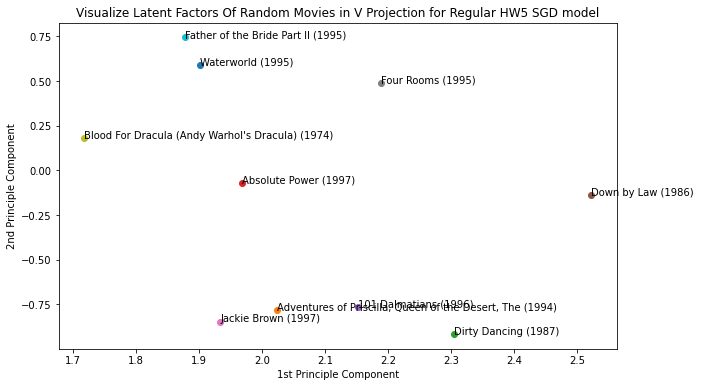

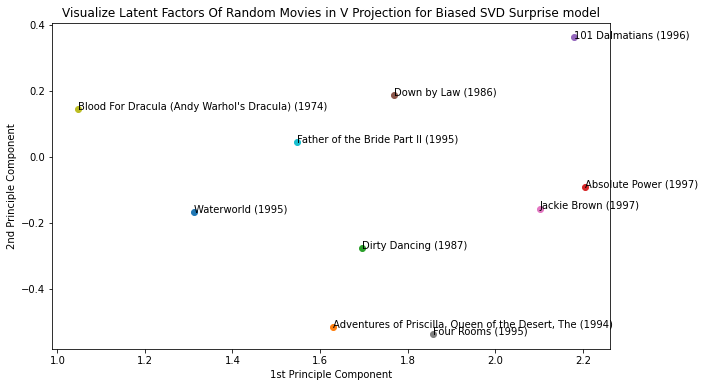

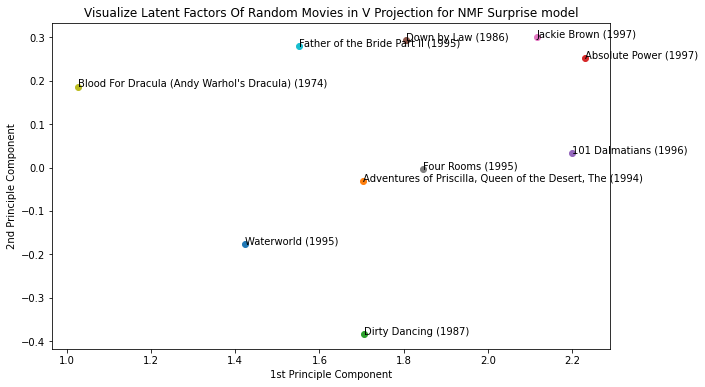

In [ ]:
#Generate random indices    
random_movies = np.random.choice(range(M), size=10, replace=False)

#Prepare Data for Visualization
m1_random, m2_random, m3_random = fetch_groups(random_movies, biased_svd, regular_nmf)

#Fetch V_proj and names for each group
v_proj_m1 = fetch_group(m1_random, m1_V_proj, transform_index=False)
v_proj_m2 = fetch_group(m2_random, m2_V_proj, transform_index=True)
v_proj_m3 = fetch_group(m3_random, m3_V_proj, transform_index=True)
names = fetch_names(m1_random)

#Visualize
visualize_projection(v_proj_m1, names, "Random Movies", "Regular HW5 SGD")
visualize_projection(v_proj_m2, names, "Random Movies", "Biased SVD Surprise")
visualize_projection(v_proj_m3, names, "Random Movies", "NMF Surprise")

Now we visualize the top 10 most popular movies using *V_proj*

['Four Rooms (1995)' 'Aristocats, The (1970)' 'Alien (1979)'
 'Promesse, La (1996)' 'L.A. Confidential (1997)'
 'Fierce Creatures (1997)' 'Scream (1996)'
 'Madness of King George, The (1994)' 'Frighteners, The (1996)'
 'Event Horizon (1997)']
['Four Rooms (1995)' 'Aristocats, The (1970)' 'Alien (1979)'
 'Promesse, La (1996)' 'L.A. Confidential (1997)'
 'Fierce Creatures (1997)' 'Scream (1996)'
 'Madness of King George, The (1994)' 'Frighteners, The (1996)'
 'Event Horizon (1997)']
['Four Rooms (1995)' 'Aristocats, The (1970)' 'Alien (1979)'
 'Promesse, La (1996)' 'L.A. Confidential (1997)'
 'Fierce Creatures (1997)' 'Scream (1996)'
 'Madness of King George, The (1994)' 'Frighteners, The (1996)'
 'Event Horizon (1997)']


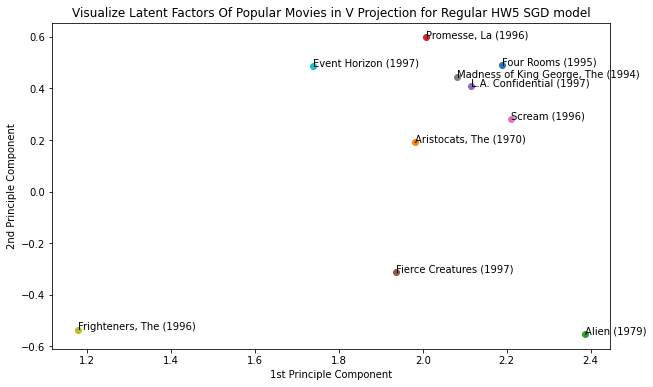

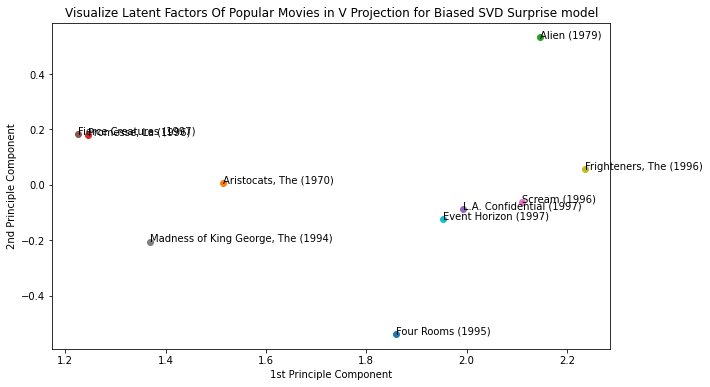

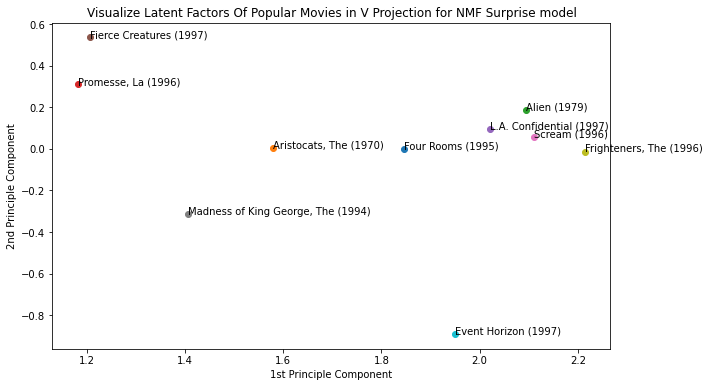

In [ ]:
#Prepare Data for Visualization
m1_popular, m2_popular, m3_popular = fetch_groups(np.array(top_ten_popular[:,0], dtype=int), biased_svd, regular_nmf)

#Fetch V_proj and names for each group
v_proj_m1 = fetch_group(m1_popular, m1_V_proj, transform_index=False)
v_proj_m2 = fetch_group(m2_popular, m2_V_proj, transform_index=True)
v_proj_m3 = fetch_group(m3_popular, m3_V_proj, transform_index=True)
names = fetch_names(m1_popular)

#Visualize
visualize_projection(v_proj_m1, names, "Popular Movies", "Regular HW5 SGD")
visualize_projection(v_proj_m2, names, "Popular Movies", "Biased SVD Surprise")
visualize_projection(v_proj_m3, names, "Popular Movies", "NMF Surprise")

 Now we visualize the top 10 best-rated movies using *V_proj*

['All Over Me (1997)' 'Farewell to Arms, A (1932)'
 'Letter From Death Row, A (1998)' 'Favor, The (1994)'
 'Naked in New York (1994)' 'Top Hat (1935)' 'Tom and Huck (1995)'
 'Office Killer (1997)' 'Kicked in the Head (1997)'
 'Candyman: Farewell to the Flesh (1995)']
['All Over Me (1997)' 'Farewell to Arms, A (1932)'
 'Letter From Death Row, A (1998)' 'Favor, The (1994)'
 'Naked in New York (1994)' 'Top Hat (1935)' 'Tom and Huck (1995)'
 'Office Killer (1997)' 'Kicked in the Head (1997)'
 'Candyman: Farewell to the Flesh (1995)']
['All Over Me (1997)' 'Farewell to Arms, A (1932)'
 'Letter From Death Row, A (1998)' 'Favor, The (1994)'
 'Naked in New York (1994)' 'Top Hat (1935)' 'Tom and Huck (1995)'
 'Office Killer (1997)' 'Kicked in the Head (1997)'
 'Candyman: Farewell to the Flesh (1995)']


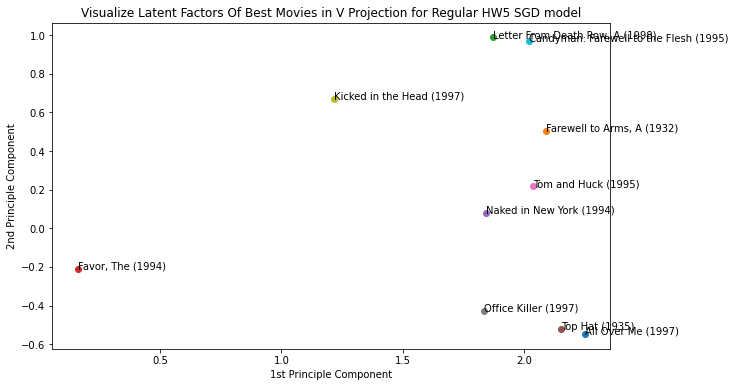

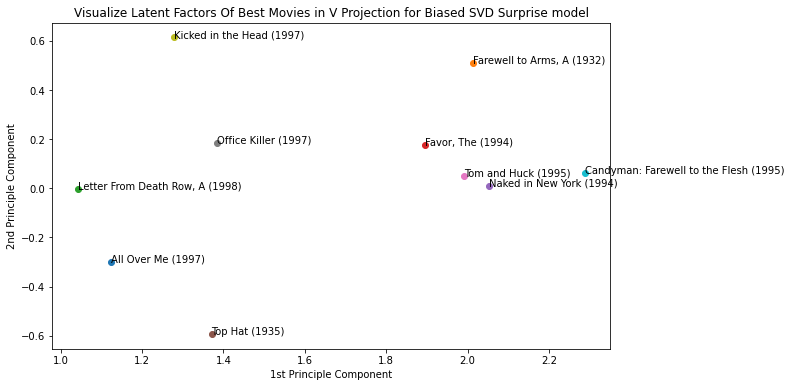

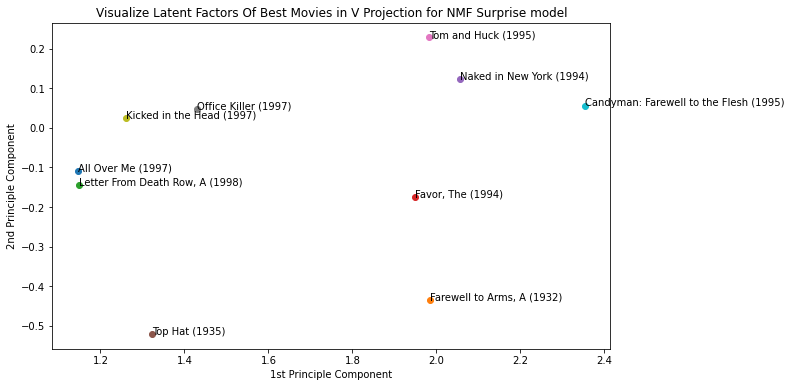

In [ ]:
#Prepare Data for Visualization
m1_best, m2_best, m3_best = fetch_groups(np.array(top_ten_rated[:,0], dtype=int), biased_svd, regular_nmf)

#Fetch V_proj and names for each group
v_proj_m1 = fetch_group(m1_best, m1_V_proj, transform_index=False)
v_proj_m2 = fetch_group(m2_best, m2_V_proj, transform_index=True)
v_proj_m3 = fetch_group(m3_best, m3_V_proj, transform_index=True)
names = fetch_names(m1_best)

#Visualize
visualize_projection(v_proj_m1, names, "Best Movies", "Regular HW5 SGD")
visualize_projection(v_proj_m2, names, "Best Movies", "Biased SVD Surprise")
visualize_projection(v_proj_m3, names, "Best Movies", "NMF Surprise")

Now we visualize 10 movies from each of the 3 genres we selected in *V_proj*

In [ ]:
#Grab Movie IDs for Genres
genre_list = []
for i in range(3):
  indices = np.where(movies[genres[i]] == 1)[0]
  genre_list.append(indices[0:10])

#Prepare Data for Visualization
m1_g1, m2_g1, m3_g1 = fetch_groups(np.array(genre_list[0], dtype=int), biased_svd, regular_nmf)
m1_g2, m2_g2, m3_g2 = fetch_groups(np.array(genre_list[1], dtype=int), biased_svd, regular_nmf)
m1_g3, m2_g3, m3_g3 = fetch_groups(np.array(genre_list[2], dtype=int), biased_svd, regular_nmf)

#Fetch V_proj for each group
g1_v_proj_m1 = fetch_group(m1_g1, m1_V_proj, transform_index=False)
g1_v_proj_m2 = fetch_group(m2_g1, m2_V_proj, transform_index=True)
g1_v_proj_m3 = fetch_group(m3_g1, m3_V_proj, transform_index=True)
g2_v_proj_m1 = fetch_group(m1_g2, m1_V_proj, transform_index=False)
g2_v_proj_m2 = fetch_group(m2_g2, m2_V_proj, transform_index=True)
g2_v_proj_m3 = fetch_group(m3_g2, m3_V_proj, transform_index=True)
g3_v_proj_m1 = fetch_group(m1_g3, m1_V_proj, transform_index=False)
g3_v_proj_m2 = fetch_group(m2_g3, m2_V_proj, transform_index=True)
g3_v_proj_m3 = fetch_group(m3_g3, m3_V_proj, transform_index=True)

#Fetch names for each group
names1 = fetch_names(m1_g1)
names2 = fetch_names(m1_g2)
names3 = fetch_names(m1_g3)

In [ ]:
#Generates annotated projection of V projection for group
def visualize_projection_list(V_proj_list, names_list, grouping_title, model_name):
  plt.figure(figsize=(10,6))
  for j in range(len(V_proj_list)):
    V_proj = V_proj_list[j]
    names = names_list[j]
    assert V_proj.shape[0] == names.shape[0]
    plt.title("Visualize Latent Factors Of {} in V Projection for {} model".format(grouping_title, model_name))
    plt.xlabel("1st Principal Component")
    plt.ylabel("2nd Principal Component")
    plt.scatter(V_proj[:,0], V_proj[:,1])
  plt.legend(genres)


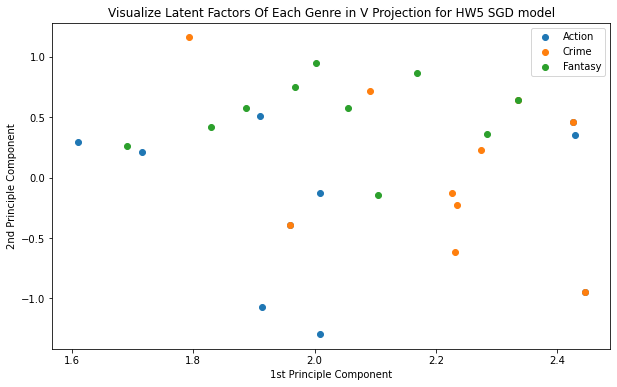

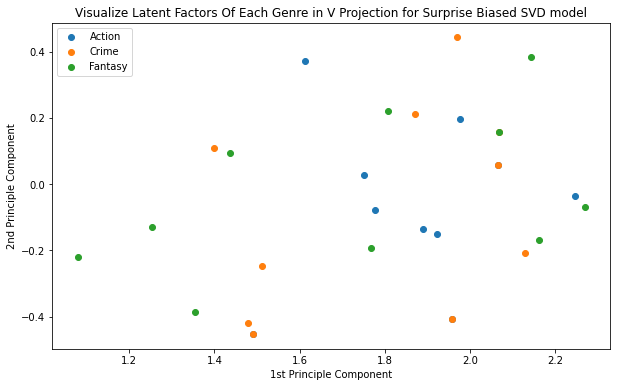

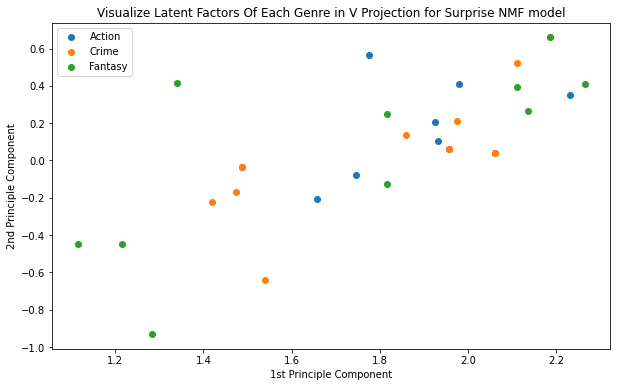

In [ ]:
#Visualize
visualize_projection_list([g1_v_proj_m1, g2_v_proj_m1, g3_v_proj_m1], [names1, names2, names3], "Each Genre", "HW5 SGD")
visualize_projection_list([g1_v_proj_m2, g2_v_proj_m2, g3_v_proj_m2], [names1, names2, names3], "Each Genre", "Surprise Biased SVD")
visualize_projection_list([g1_v_proj_m3, g2_v_proj_m3, g3_v_proj_m3], [names1, names2, names3], "Each Genre", "Surprise NMF")

In [ ]:
#This functin prints the 1st vs. 2nd principal components of the U/V projections
def visualize_projections(U, V, model_name = ""):
  
  #Project U and V into 2D space
  A, S, B = np.linalg.svd(V)
  U_proj = np.matmul(np.transpose(A[:,0:2]), U)
  V_proj = np.matmul(np.transpose(A[:,0:2]), V)

  #Visualize Latent Factor 2D U/V Projections
  plt.figure(figsize=(10,6))
  plt.title("Visualize Latent Factors in U Projection Of {} Model".format(model_name))
  plt.xlabel("1st Principal Component")
  plt.ylabel("2nd Principal Component")
  plt.scatter(U_proj[0,:], U_proj[1, :])

  plt.figure(figsize=(10,6))
  plt.title("Visualize Latent Factors in V Projection Of {} Model".format(model_name))
  plt.xlabel("1st Principal Component")
  plt.ylabel("2nd Principal Component")
  plt.scatter(V_proj[0,:], V_proj[1, :])

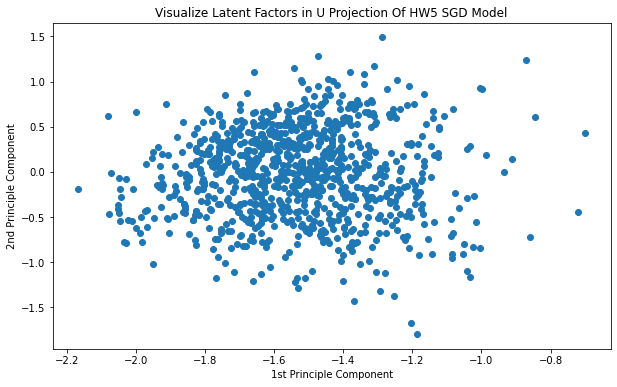

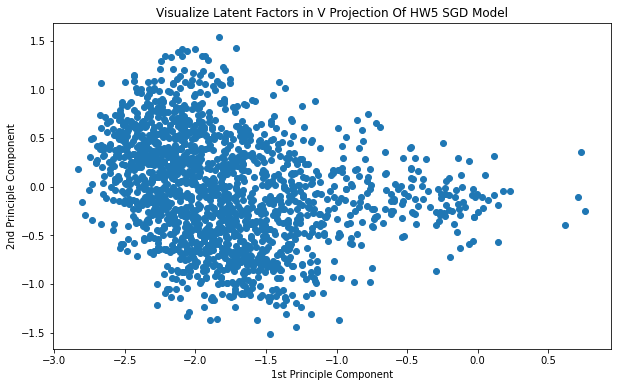

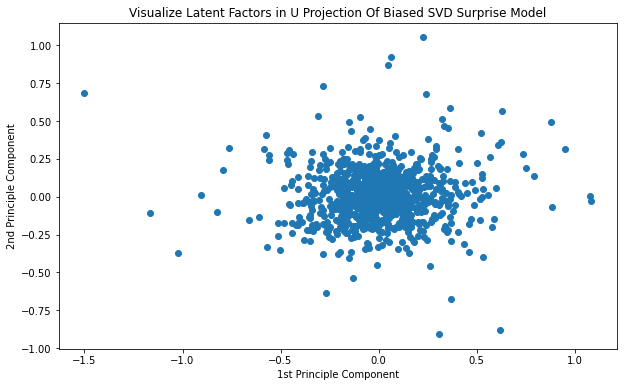

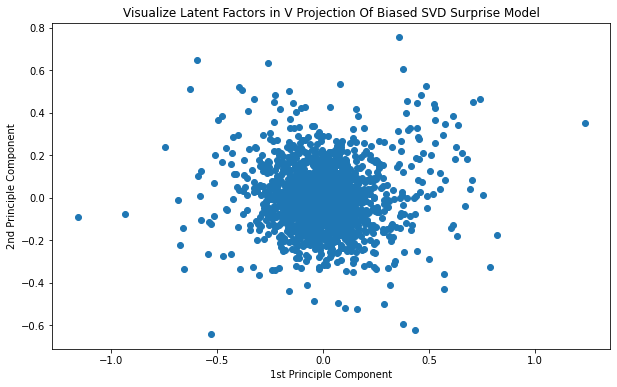

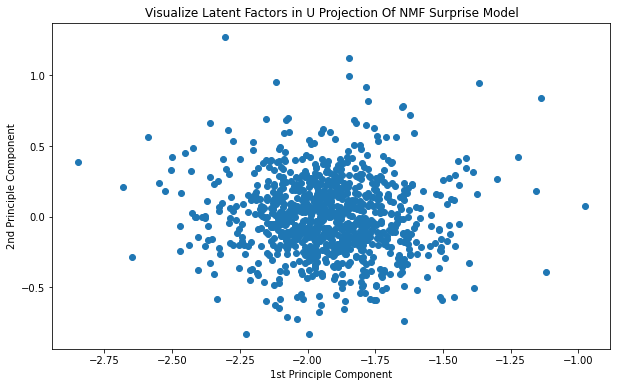

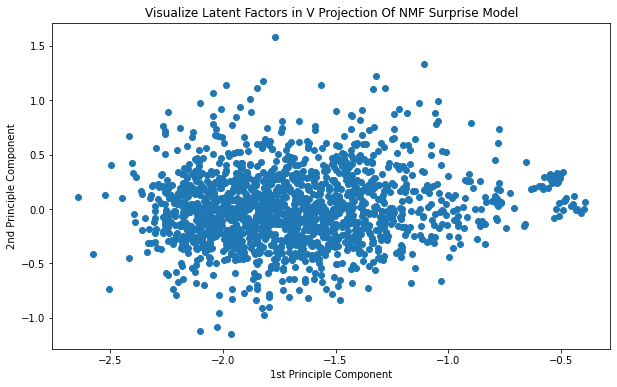

In [ ]:
visualize_projections(m1_U.T, m1_V, model_name="HW5 SGD")
visualize_projections(m2_U.T, m2_V.T, model_name="Biased SVD Surprise")
visualize_projections(m3_U.T, m3_V.T, model_name="NMF Surprise")

In [ ]:
#This functin prints the 1st vs. 2nd principal components of the U/V projections
def visualize_projections_interesting(U, V, model_name = ""):
  
  #Project U and V into 2D space
  A, S, B = np.linalg.svd(V)
  U_proj = np.matmul(np.transpose(A[:,0:2]), U)
  V_proj = np.matmul(np.transpose(A[:,0:2]), V)

  #Compute mean scores
  mean_scores = []
  for i in range(1,V.shape[1] + 1):
    mean_scores.append(np.mean(movie_ratings[i])**2)

  #Visualize Latent Factor 2D U/V Projections
  plt.figure(figsize=(12,8))
  plt.title("Visualize Latent Factors in V Projection Of {} Model".format(model_name))
  plt.xlabel("1st Principal Component")
  plt.ylabel("2nd Principal Component")
  plt.scatter(V_proj[0,:], V_proj[1, :], s=mean_scores)

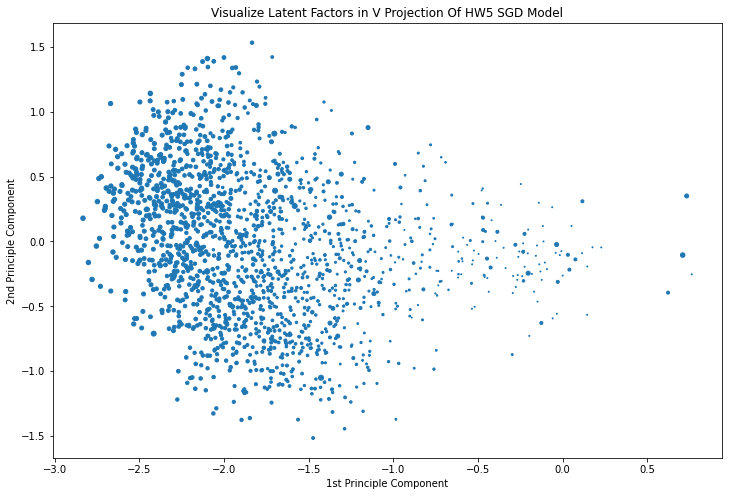

In [ ]:
visualize_projections_interesting(m1_U.T, m1_V, model_name="HW5 SGD")

Here, we plot the 1st two principal components of our V projection for the SGD model we built in HW5. We note that this plot scales the size of each marker to the mean squared rating of the movie. We observe that the mean squared rating is negatively correlated to the 1st principal component, but it is uncorrelated to the second principal component. In particular, it seems that the larger the 1st principal component, the more infrequent the value and the worse the However, movies are equally distributed along the axis of the 2nd principal component, which does not seem to correlate strongly with the rating of the movie.

# Performance Evaluation
Below, we evaluate the performance of the matrix factorization model from HW5, biased matrix factorization model from Surprise, and then non-negative matrix factorization model from Surprise.

In [ ]:
#Evaluate Model 1 accuracy
m1_test_predictions = np.array([np.dot(m1_U[i-1], m1_V[:,j-1]) for (i,j,Yij) in Y_test])
m1_test_err = np.mean(np.array([(m1_test_predictions[idx] - Yij)**2 for idx, (i,j,Yij) in enumerate(Y_test)]))

#Evaluate models 
m2_test_predictions = biased_svd.test(testset)
m3_test_predictions = regular_nmf.test(testset)

#Then compute MSE
m2_test_err = accuracy.mse(m2_test_predictions)
m3_test_err = accuracy.mse(m3_test_predictions)

MSE: 0.8705
MSE: 0.9206


In [ ]:
#Compare performance across models
print("Model 1 MSE Test Error: ", m1_test_err)
print("Model 2 MSE Test Error: ", m2_test_err)
print("Model 3 MSE Test Error: ", m3_test_err)

Model 1 MSE Test Error:  1.2288175964715156
Model 2 MSE Test Error:  0.8705341241406073
Model 3 MSE Test Error:  0.9206293319960318
